In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.optimize
from scipy.misc import derivative
import numpy as np
from matplotlib import ticker
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose




In [56]:
df = pd.read_csv('clean_data.csv')
df.head(3)

,fips,id,year,element,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,country
0,AC,ACW00011604,1961,TAVG,-0.93,2.32,4.68,7.69,11.24,15.95,15.66,14.77,14.09,11.70,5.06,-0.43,Antigua and Barbuda
1,AC,ACW00011604,1962,TAVG,1.09,0.81,-1.58,6.31,9.04,13.77,15.06,13.89,11.59,9.90,3.19,-1.30,Antigua and Barbuda
2,AC,ACW00011604,1963,TAVG,-7.17,-5.57,-1.03,5.37,12.20,16.23,16.16,15.92,13.28,9.36,5.62,-1.12,Antigua and Barbuda


In [57]:
year_group = df.groupby('year').mean()
year_group.head(3)


C:\Users\Fiona A\AppData\Local\Temp\ipykernel_528\100017286.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_group = df.groupby('year').mean()


,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
year,,,,,,,,,,,,
1961,6.596503,7.262983,8.149934,10.391513,14.239515,18.630701,20.140119,19.947319,16.634087,12.407242,7.701463,6.573764
1962,6.779029,7.716334,6.589528,11.027285,14.915314,17.820533,19.505686,19.516880,16.199104,12.679688,8.207250,5.636804
1963,7.425451,7.404904,7.922432,10.832225,14.817056,18.084707,20.196644,19.568654,17.018353,13.754391,8.735997,5.802251


In [58]:
year_group.tail(3)

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
year,,,,,,,,,,,,
2008,6.559138,7.066439,7.560139,10.941591,14.715230,18.777355,20.771910,20.030814,16.874004,12.368371,8.431280,6.936121
2009,7.215377,7.173510,7.869725,11.302941,15.344572,18.397438,20.316735,20.215064,17.615987,11.171096,9.531471,6.582886
2010,6.556713,6.508815,8.429566,11.945247,15.021387,18.986477,21.354238,20.670111,17.247374,12.713146,7.756206,6.311810


In [59]:

x_years = np.arange(start=1961, stop=2011)
x_months = np.array(['jan', 'feb', 'mar', 'apr', 'may', 'jun',
                   'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])

x = list(itertools.product(x_years, x_months))
x_array = np.array(x)
type(x_array)
x_array

array([['1961', 'jan'],
       ['1961', 'feb'],
       ['1961', 'mar'],
       ...,
       ['2010', 'oct'],
       ['2010', 'nov'],
       ['2010', 'dec']], dtype='<U11')

In [60]:
y = np.array(year_group)

flat_y = np.concatenate(y)
type(flat_y)
flat_y

array([ 6.59650319,  7.26298295,  8.1499344 , 10.39151304, 14.23951501,
       18.63070103, 20.1401191 , 19.94731941, 16.63408663, 12.40724237,
        7.70146347,  6.57376446,  6.77902949,  7.7163342 ,  6.58952752,
       11.02728518, 14.91531385, 17.82053324, 19.50568643, 19.51687956,
       16.19910434, 12.67968763,  8.20724964,  5.6368044 ,  7.42545101,
        7.40490386,  7.92243212, 10.83222487, 14.81705552, 18.08470721,
       20.19664382, 19.56865399, 17.01835292, 13.75439146,  8.73599681,
        5.80225104,  5.66675527,  5.92479896,  7.24349792, 10.89176197,
       14.98382235, 17.92209554, 20.35475676, 18.96013628, 16.0509746 ,
       11.7957798 ,  7.7738723 ,  6.95929959,  7.57230816,  7.09889563,
        6.45261311, 10.56012321, 14.56881199, 17.66240653, 19.57564769,
       19.21342927, 15.76486024, 12.37274558,  8.16076168,  6.78568513,
        7.73873703,  7.37844997,  8.00961715, 10.34605511, 14.37252339,
       18.14628676, 20.46725494, 19.32487165, 16.39769372, 11.81

In [61]:
t = [t for t in range(600)]

$$ f(t)  = at^2 + bt + c + (d\times sin(\frac{2\pi }{12} + \frac{\pi }{2}) $$

In [62]:
def polynomial_function(t, a, b, c, d):
    out = 0
    #print(t, type(t))
    out += (a*t)*(a*t)
    out += b*t
    out += c
    out += d * np.sin(2 * np.pi / 12 * t + np.pi/2)
    
    return  out

In [63]:
""" 
def polynomial_function(t, a, b, c, d, e):
    out = 0
    #print(t, type(t))
    out += (a*t)*(a*t)
    out += b*t
    out += c
    out += d * np.sin(2 * np.pi / 12 * t + e)
    
    return  out

    """

' \ndef polynomial_function(t, a, b, c, d, e):\n    out = 0\n    #print(t, type(t))\n    out += (a*t)*(a*t)\n    out += b*t\n    out += c\n    out += d * np.sin(2 * np.pi / 12 * t + e)\n    \n    return  out\n\n    '

In [64]:
polynomial_function(600, 2.05932666e-06, -2.50974818e-04,  1.22860194e+01, -5.74892891e-01)

11.560543144897467

In [65]:
t = np.array(t)

In [66]:
df = year_group.stack()
df = df.reset_index()
df.columns = ['Year', 'Month', 'Temperature']

In [67]:
df['month_year'] = df['Month'] + '-' + df['Year'].astype(str)

In [68]:
dataframe = df[['Temperature', 'month_year']]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


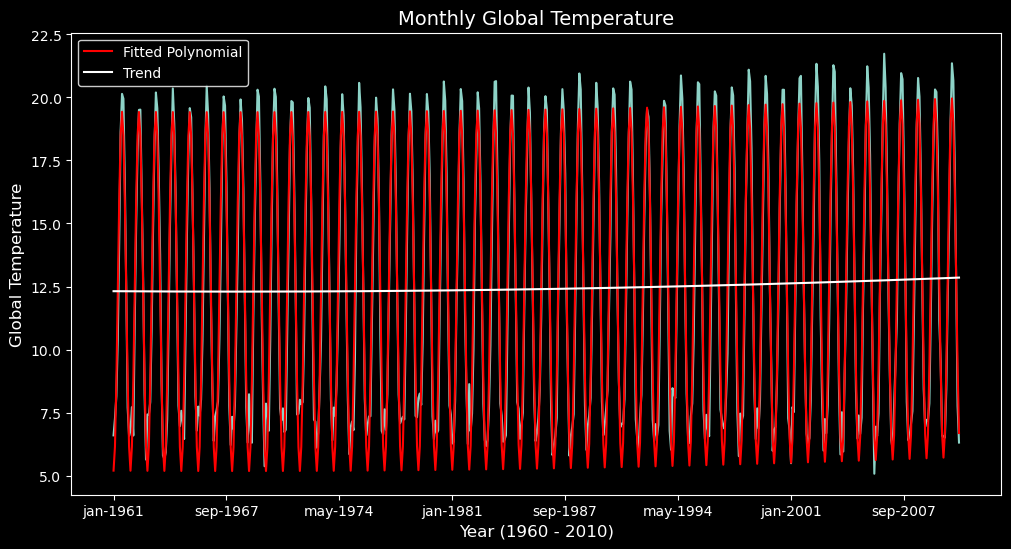

In [79]:
# Plotting the original time series 
plt.figure(figsize=(12, 6))
plt.plot(flat_y)


num_ticks = 10
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))


# Fit the polynomial using curve_fit
popt, pcov = scipy.optimize.curve_fit(polynomial_function, t, flat_y)
# Generate the fitted curve using the optimized parameters
fitted_curve = polynomial_function(t, *popt)

a_popt, b_popt, c_popt, d_popt = popt
fitted_curve_without_cycle = polynomial_function(t, a_popt, b_popt, c_popt, 0)

# Plotting fitted curve


plt.style.use('dark_background')

# Cambiar el color de fondo de las etiquetas de los ejes
ax = plt.gca()
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

# Cambiar el color de fondo de la leyenda
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('black')
frame.set_edgecolor('white')


plt.plot(df['month_year'], fitted_curve, color='red', label='Fitted Polynomial')
plt.plot(df['month_year'], fitted_curve_without_cycle, color='white', label='Trend')

plt.xlabel('Year (1960 - 2010)', fontsize=12)
plt.ylabel('Global Temperature', fontsize=12)
plt.title('Monthly Global Temperature', fontsize=14)
plt.legend(fontsize=10)

legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('black')
frame.set_edgecolor('white')

plt.show()

In [70]:
popt_a, popt_b, popt_c, popt_d = popt


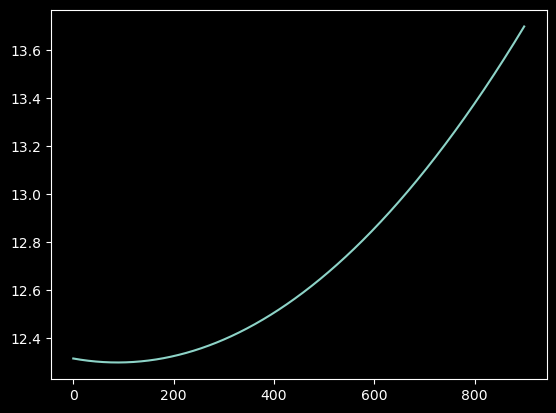

In [71]:
# prediction with this model until 2035 

x = np.array([x for x in range(900)])

plt.plot(x, polynomial_function(x, 1.45932238e-03, -3.75929755e-04,  1.23150291e+01, 0))

In [72]:
a = popt_a
b = popt_b
c = popt_c
d = 0

monthly_growth_rate = []

# Choose a specific value of t to calculate the growth rate at that point
for month in t:
# Calculate the growth rate at t
    growth_rate = derivative(polynomial_function, month, args=(a, b, c, d))
    monthly_growth_rate.append(growth_rate)


C:\Users\Fiona A\AppData\Local\Temp\ipykernel_528\3648749223.py:11: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  growth_rate = derivative(polynomial_function, month, args=(a, b, c, d))


In [73]:
yearly_averages = []

# Calculate the average every year
for i in range(0, len(monthly_growth_rate), 12):
    year = monthly_growth_rate[i:i+12]
    yearly_average = sum(year) / len(year)
    yearly_averages.append(yearly_average)



In [74]:
average_per_decade = []

# Calculate the average every year
for i in range(0, len(yearly_averages), 10):
    decade = yearly_averages[i:i+10]
    decade_average = sum(decade) / len(decade)
    average_per_decade.append(decade_average)

In [75]:
average_per_decade

[-0.00012250557013756918,
 0.0003886040109905157,
 0.0008997135921186303,
 0.0014108231732467224,
 0.0019219327543748294]

In [76]:
growth_rate = derivative(polynomial_function, 2, args=(a, b, c, d))
print(growth_rate)

-0.0003674122444285999


C:\Users\Fiona A\AppData\Local\Temp\ipykernel_528\2931261734.py:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  growth_rate = derivative(polynomial_function, 2, args=(a, b, c, d))


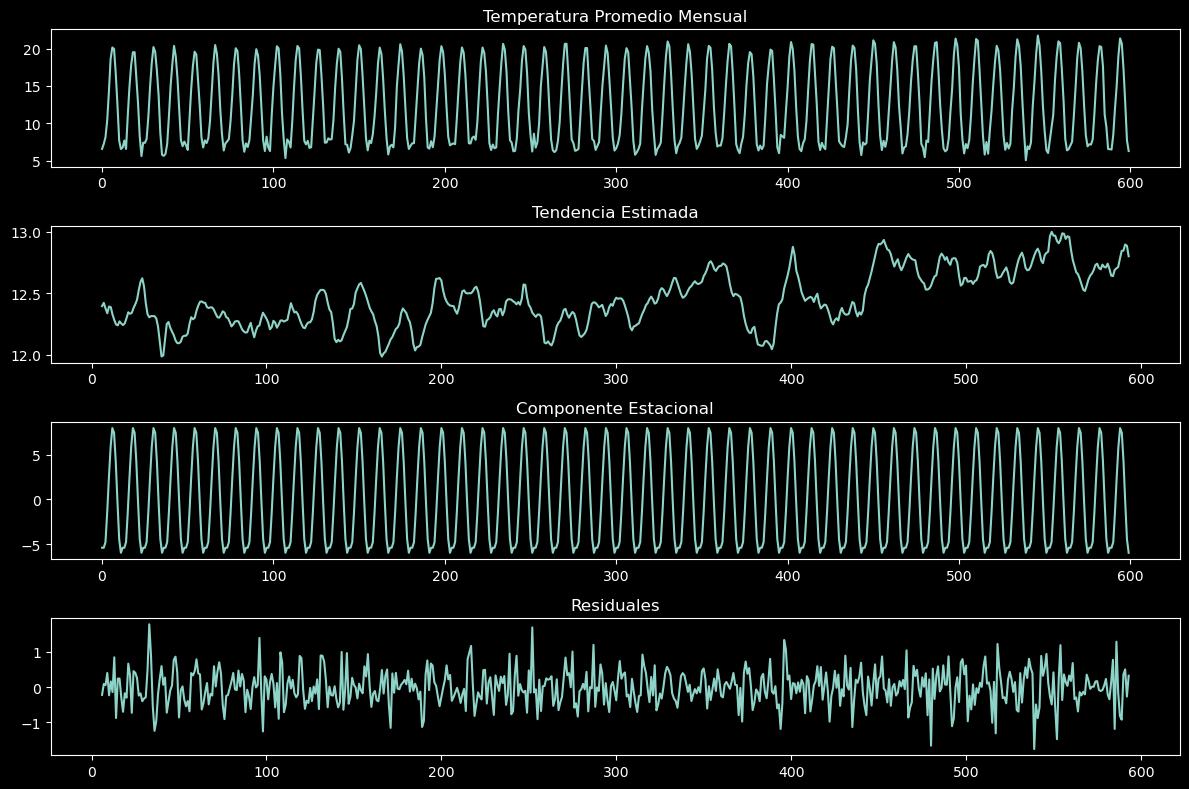

In [77]:
temperature_column = df['Temperature']
result = seasonal_decompose(temperature_column, model = 'additive', period = 12)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(temperature_column)
plt.title('Temperatura Promedio Mensual')

plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Tendencia Estimada')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Componente Estacional')

plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residuales')

plt.tight_layout()
plt.show()